## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

## 百度百科 北京地铁 

In [161]:
import requests
from bs4 import BeautifulSoup
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
myheader = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}
r = requests.get(url, headers = myheader)
r.encoding = 'gb2312'
html_contents = r.content
html_soup = BeautifulSoup(html_contents, "html.parser")

In [2]:
line_table =  html_soup.find_all('table', {"log-set-param":"table_view", "data-sort":"sortDisabled"})
line_table = str(line_table)


In [4]:
import re

In [8]:
content = line_table
pattern = re.compile('<td.*?width="204".*?>.*?<a.*?href="(.*?)".*?>(.*?)</a>.*?</td>', re.S)
results = re.findall(pattern, content)

In [23]:
subway_line_url = {}
for line in results:
#     if line[1] in subway_line_url.keys() and :
#         line = list(line)
#         line[1] = line[1]+'(other)'
    subway_line_url[line[1]] = 'https://baike.baidu.com' + line[0]

In [164]:
subway_line_url # 这是各地铁线路的页面链接

$$百度百科不好做，没规律$$

## 北京地铁官网

In [133]:
# def get_line_stations(line_url):
BJsubway = 'https://www.bjsubway.com/e/action/ListInfo/?classid=39&ph=1'    
r = requests.get(BJsubway, verify=False)

html_contents = r.content
html_soup = BeautifulSoup(html_contents, "html.parser")
line_content =  html_soup.find_all('div',attrs={"class":"line_content"}) # 这个 div 里是线路的首末班车时刻表
line_content = str(line_content)

content = line_content
pattern = re.compile('<table.*?>(.+?)</table>',re.S)  # 每个 table 表示一条线路
results = re.findall(pattern, content)

len(results)
# 

D:\Pycharm\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


22

In [226]:
line_station = {}
for res in results:
    line = re.findall('<td.colspan.*?>\s*?(\S*?)首末车时刻表</td>', res)
    pattern = re.compile('<tbody>.*?</tbody>',re.S)
    station = re.findall(pattern ,res)
    pattern = re.compile('<tr>.*?<th.*?>(.*?)</th>.*?</tr>',re.S)
    station = re.findall(pattern, station[0])
    line_station[line[0]] = [s.strip() for s in station]

In [312]:
# 线路以字典的形式存储 line : { stations...}  下面输出看看存储的效果
for key in line_station:   
    print(key)
    print(line_station[key])
    print()
    break # 以一号线为例子哈

1号线 :
['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东']



##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [228]:
from collections import defaultdict

station_connection = defaultdict(list)  # 站点连接关系

In [229]:
def get_station_connections(line_station):
    for key in line_station:
        for i in range(len(line_station[key])-1):    
            station1 = line_station[key][i]
            station2 = line_station[key][i+1]
            station_connection[station1].append(station2)
            station_connection[station2].append(station1)
                
get_station_connections(line_station)

In [230]:
station_connection # 各站点的连接关系

defaultdict(list,
            {'苹果园': ['古城', '金安桥', '杨庄'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
             '西单': ['复兴门', '天安门西', '宣武门', '灵境胡同'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '崇文门', '灯市口'],
             '建国门': ['东单', '永安里', '朝阳门', '北京站'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '金台路'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '

In [231]:
%matplotlib inline

In [232]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei.ttf']
plt.rcParams['axes.unicode_minus'] = False

In [233]:
station = list(station_connection.keys())

In [234]:
graph = nx.Graph(station_connection)
# graph.add_nodes_from(station)

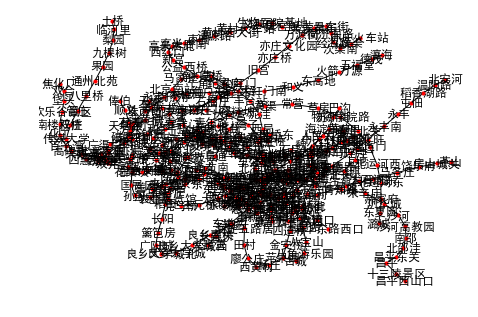

In [237]:
nx.draw(graph, with_labels=True, node_size=10)

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [305]:
def pretty_print(path):
    string = ''
    for station in path:
        string = string + station + '->'
    print(string[:-2])
    print()

In [306]:
def search(graph, start, goal, search_strategy):
    queue = [[start]] # 看看和经典的广度优先有什么不一样的 ^-^
    visited = set()
    paths = []
    while queue:
        path = queue.pop(0)
        city = path[-1]
        if city in visited: continue
        for c in graph[city]:
            path_new = path+[c]
            if path_new[-1]==goal: paths.append(path_new)
            queue.append(path_new)
        visited.add(city)
    paths = search_strategy(paths)
    return paths   

In [ ]:
# eg：

In [309]:
paths = search(station_connection, '慈寿寺', '军事博物馆', search_strategy=lambda n: n)

In [310]:
for path in paths:
    pretty_print(path)

慈寿寺->西钓鱼台->公主坟->军事博物馆

慈寿寺->花园桥->白石桥南->白堆子->军事博物馆

慈寿寺->西钓鱼台->公主坟->军事博物馆->木樨地->军事博物馆

慈寿寺->西钓鱼台->公主坟->军事博物馆->北京西站->军事博物馆



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)